## Import Data

In [3]:
import pandas as pd

In [4]:
#Import Datasets
#housing_df = pd.read_csv(r'datasets\incidences_With_housing_data.csv', encoding='latin-1')
#census_df = pd.read_csv(r'datasets\incidences_With_census_data.csv', encoding='latin-1')
#crime_df = pd.read_csv(r'datasets\crimes_per_grid_per_quarter.csv', encoding = 'latin-1')
#incidences_df = pd.read_csv(r'datasets\incidences_per_grid_per_quarter.csv', encoding = 'latin-1')
all_data = pd.read_csv(r'https://raw.githubusercontent.com/JeffRileyMtl/MontrealFire/master/data.csv')

In [ ]:
#housing_df.head()

In [ ]:
#census_df.head()

In [4]:
crime_df.head()

NameError: name 'crime_df' is not defined

In [ ]:
incidences_df.head()

NameError: ignored

In [5]:
my_df = pd.merge(incidences_df, crime_df, how = 'left', left_on = ['Key', 'year', 'Quarter'], right_on= ['Key', 'year', 'Quarter'])

NameError: name 'incidences_df' is not defined

In [5]:
all_data.head()

,Unnamed: 0,Key,year,month,Sum_Count,Monthly_Sum,NOM_CAS_AD,NO_CAS_ADM,OBJECTID,AreaSqKm,...,Input_#2_Key,Count,Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,0,Caserne 03 Grid0_0,2015,1,13,Monthly_Sum,Caserne 03,3,312,1.325306,...,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
1,1,Caserne 03 Grid0_0,2015,2,8,Monthly_Sum,Caserne 03,3,312,1.325306,...,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
2,2,Caserne 03 Grid0_0,2015,3,11,Monthly_Sum,Caserne 03,3,312,1.325306,...,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
3,3,Caserne 03 Grid0_0,2015,4,21,Monthly_Sum,Caserne 03,3,312,1.325306,...,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
4,4,Caserne 03 Grid0_0,2015,5,10,Monthly_Sum,Caserne 03,3,312,1.325306,...,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286


In [6]:
#my_df.columns
all_data.columns

Index(['Unnamed: 0', 'Key', 'year', 'month', 'Sum_Count', 'Monthly_Sum',
       'NOM_CAS_AD', 'NO_CAS_ADM', 'OBJECTID', 'AreaSqKm', 'CentroidX',
       'CentroidY', 'GridName', 'Input_#2_Key', 'Count', 'Fire Count per Year',
       'Fire Count 6 years', 'Avg_Pop__Densi', 'Avg_Income___T',
       'Avg_Income___2', 'Avg_Income___3', 'Avg_Housing___', 'Avg_Education_'],
      dtype='object')

In [6]:
#Clean data
target_col_2 = ['Key', 'year', 'month', 'Sum_Count', 'AreaSqKm', 'Count','Avg_Pop__Densi', 
                'Avg_Income___T', 'Avg_Income___2', 'Avg_Income___3', 'Avg_Housing___', 'Avg_Education_']
data = all_data[target_col_2]
data = data.dropna()

In [7]:
#Rename Columns 
data = data.rename(columns= {'Count': 'No_of_Crimes', 'Sum_Count':'No_of_fires'})
data.head()

,Key,year,month,No_of_fires,AreaSqKm,No_of_Crimes,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,Caserne 03 Grid0_0,2015,1,13,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
1,Caserne 03 Grid0_0,2015,2,8,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
2,Caserne 03 Grid0_0,2015,3,11,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
3,Caserne 03 Grid0_0,2015,4,21,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286
4,Caserne 03 Grid0_0,2015,5,10,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286


In [10]:
data.shape

(55582, 12)

In [8]:
#Create HighRisk/Low Risk Feature

mean_fire = data['No_of_fires'].mean()
print("mean_fire: "+str(mean_fire))
import numpy as np
data['Risk Category'] = np.where(data['No_of_fires'] >=mean_fire, 1, 0)
data.head(10)

mean_fire: 12.388668993559065


,Key,year,month,No_of_fires,AreaSqKm,No_of_Crimes,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Risk Category
0,Caserne 03 Grid0_0,2015,1,13,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
1,Caserne 03 Grid0_0,2015,2,8,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,0
2,Caserne 03 Grid0_0,2015,3,11,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,0
3,Caserne 03 Grid0_0,2015,4,21,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
4,Caserne 03 Grid0_0,2015,5,10,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,0
5,Caserne 03 Grid0_0,2015,6,20,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
6,Caserne 03 Grid0_0,2015,7,27,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
7,Caserne 03 Grid0_0,2015,8,17,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
8,Caserne 03 Grid0_0,2015,9,14,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1
9,Caserne 03 Grid0_0,2015,10,16,1.325306,10.0,11430.107143,898.214286,100.0,71.55,561.785714,890.714286,1


In [8]:
data.describe()

,year,month,No_of_fires,AreaSqKm,No_of_Crimes,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Risk Category
count,55582.000000,55582.000000,55582.000000,55582.000000,55582.000000,55582.000000,55582.000000,55582.0,55582.000000,55582.000000,55582.000000,55582.000000
mean,2018.240797,6.321075,12.388669,10.038148,14.202476,6763.655314,579.554730,100.0,69.287102,308.819414,579.592307,0.344284
std,2.172659,3.455844,13.483883,5.856467,15.226825,4627.962664,235.118763,0.0,6.076413,148.698459,236.082475,0.475139
min,2015.000000,1.000000,1.000000,1.312419,1.000000,33.400000,313.333333,100.0,42.450000,154.000000,301.666667,0.000000
25%,2016.000000,3.000000,3.000000,5.110053,4.000000,3232.011111,459.444444,100.0,65.250000,234.615385,457.187500,0.000000
50%,2018.000000,6.000000,7.000000,8.683485,9.000000,6070.266667,516.500000,100.0,69.257143,276.190476,516.500000,0.000000
75%,2020.000000,9.000000,17.000000,15.064995,19.000000,9415.358333,606.250000,100.0,73.391667,328.000000,601.666667,1.000000
max,2022.000000,12.000000,128.000000,23.545964,85.000000,32426.444444,3770.000000,100.0,87.500000,2120.000000,3840.000000,1.000000


In [ ]:
#Convert Months into Cyclical Pattern

In [9]:
#Get Train data based on years 2015 -2020, test on 2021
train = data[(data['year']>=2015) &(data['year']<=2020)]
test = data[data['year']==2021]

In [10]:
#Split into features and target
X_train = train.drop(['Risk Category', 'Key','No_of_fires'], axis =1)
X_test = test.drop(['Risk Category', 'Key', 'No_of_fires'], axis =1)
y_train = train['Risk Category']
y_test = test['Risk Category']

In [14]:
print(X_train.shape)
print(y_train.shape)

(44491, 10)
(44491,)


In [15]:
X_test.shape

(7426, 10)

In [11]:
#Generate some sample hyper parameters
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print(f'Accuracy Score:{accuracy_score(test_labels, predictions)}')
    print(f'Precision:{precision_score(test_labels, predictions)}')
    print(f'Recall Score:{recall_score(test_labels, predictions)}')
    print(f'F1 score:{f1_score(test_labels, predictions)}')
    print(f'Confusion Matrix:{confusion_matrix(test_labels, predictions)}')
    df = pd.DataFrame([[accuracy_score(test_labels, predictions),
                        precision_score(test_labels, predictions),
                        recall_score(test_labels, predictions),
                        f1_score(test_labels, predictions),
                        confusion_matrix(test_labels, predictions)]],
                      columns=["Accuracy Score","Precision","Recall Score","F1 score","Confusion Matrix"])
    
    
    return df

In [13]:
#Create Model - Start of with a random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(bootstrap = True, random_state = 42)

In [19]:
#Grid search CV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [14]:
#grid_search.fit(X_train, y_train)
model = classifier.fit(X_train, y_train)

In [21]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


KeyboardInterrupt: 

In [23]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [25]:
best_grid = grid_search.best_estimator_

best_grid


RandomForestClassifier(max_depth=80, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=300, random_state=42)

In [15]:
#Get predictions and evaluate accuracy
#evaluate(best_grid, X_test, y_test)
evaluate(model, X_test, y_test)

Accuracy Score:0.834365741987611
Precision:0.8279631760644419
Recall Score:0.6071729957805907
F1 score:0.7005842259006816
Confusion Matrix:[[4757  299]
 [ 931 1439]]


,Accuracy Score,Precision,Recall Score,F1 score,Confusion Matrix
0,0.834366,0.827963,0.607173,0.700584,"[[4757, 299], [931, 1439]]"


In [21]:
GG=classifier.predict(X_test)


In [22]:
GG

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
GG.shape

(7426,)

In [23]:
y_test

72       0
73       1
74       1
75       0
76       0
        ..
61590    0
61591    0
61592    0
61593    0
61594    0
Name: Risk Category, Length: 7426, dtype: int32

In [25]:
y_test.shape

(7426,)

In [23]:
#feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':best_grid.feature_importances_})
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
3,No_of_Crimes,0.383531
1,month,0.158833
4,Avg_Pop__Densi,0.158168
0,year,0.096118
2,AreaSqKm,0.047563
7,Avg_Income___3,0.046405
8,Avg_Housing___,0.044581
5,Avg_Income___T,0.033609
9,Avg_Education_,0.031193
6,Avg_Income___2,0.000000


Text(0.5, 0, 'Random Forest Feature Importance Sort')

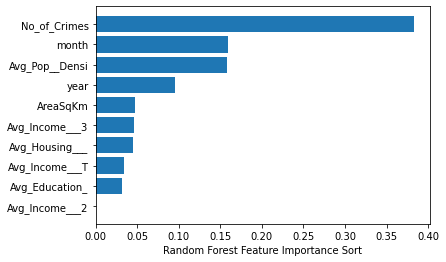

In [ ]:
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(feature_importances.features[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance Sort")

In [1]:
pwd

'c:\\Users\\jeffs\\.git\\Fire\\MontrealFire'

In [16]:
Prediction=pd.read_csv("Artificial_Grids.csv")

In [18]:
Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1984 non-null   int64 
 1   Key         1984 non-null   object
 2   Month       1984 non-null   int64 
 3   Year        1984 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.1+ KB


In [19]:
Prediction.drop('Unnamed: 0', axis=1)

,Key,Month,Year
0,Caserne 03 Grid0_0,9,2022
1,Caserne 03 Grid0_1,9,2022
2,Caserne 03 Grid1_0,9,2022
3,Caserne 03 Grid1_1,9,2022
4,Caserne 03 Grid2_0,9,2022
...,...,...,...
1979,caserne 47 Grid1_2,12,2022
1980,caserne 47 Grid1_3,12,2022
1981,caserne 47 Grid2_0,12,2022
1982,caserne 47 Grid2_1,12,2022


In [20]:
pp=classifier.predict(Prediction)

ValueError: could not convert string to float: 'Caserne 03 Grid0_0'